In [ ]:
# Project- Find out Chips purchase behaviour of population
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
purchase=pd.read_csv('/content/QVI_purchase_behaviour.csv')

In [ ]:
transaction=pd.read_excel('/content/QVI_transaction_data.xlsx')

In [ ]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'],origin = '1899-12-30')


In [ ]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1899-12-30 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1899-12-30 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1899-12-30 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,1899-12-30 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1899-12-30 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
#removing time from date
transaction['DATE'] = transaction['DATE'].dt.date

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [ ]:
#converting date in datetime format
transaction['DATE']  = pd.to_datetime(transaction['DATE'] )

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [ ]:
purchase.shape

(72637, 3)

In [ ]:
transaction.shape

(264836, 8)

In [ ]:
purchase.isnull().sum()


LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [ ]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [ ]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
transaction.nunique().sort_values(ascending=False)[:8]

TXN_ID            263127
LYLTY_CARD_NBR     72637
STORE_NBR            272
PROD_NBR             114
PROD_NAME            114
TOT_SALES            112
PROD_QTY               6
DATE                   1
dtype: int64

In [ ]:
purchase.nunique().sort_values(ascending=False)[:3]

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [ ]:
transaction['TXN_ID'].duplicated().sum()

1709

In [ ]:
transaction.drop_duplicates(subset="TXN_ID", inplace=True)
transaction['TXN_ID'].shape

(263127,)

In [ ]:
transaction.duplicated().sum()

0

In [ ]:
purchase['LYLTY_CARD_NBR'].duplicated().sum()

0

In [ ]:
#CHACKING THE 'CHIPS' IN PROD_NAME
productWords = transaction['PROD_NAME'].str.split(" ", expand = True).stack().unique()
productWords = pd.DataFrame(productWords, columns = ['words'])

transaction.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [ ]:
productWords

,words
0,Natural
1,Chip
2,
3,Compny
4,SeaSalt175g
...,...
216,Rst
217,Pork
218,Belly
219,Pc


In [ ]:
#removing digits and special chacter from text
productWords['words'] = productWords['words'].str.replace('[^\w\s]','')
productWords['words'] = productWords['words'].str.replace('\d+', '')

<ipython-input-216-495dd2167283>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  productWords['words'] = productWords['words'].str.replace('[^\w\s]','')
<ipython-input-216-495dd2167283>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  productWords['words'] = productWords['words'].str.replace('\d+', '')


In [ ]:
productWords.groupby('words').size().sort_values(ascending=False)

words
g           21
             2
Chilli       2
Chives       2
G            2
            ..
Fig          1
Flavour      1
FrchOnin     1
French       1
saltd        1
Length: 197, dtype: int64

In [ ]:
#removing slasa products from PROD_NAME
transaction['SALSA'] = transaction['PROD_NAME'].str.lower().str.contains('salsa')
transaction = transaction[transaction['SALSA'] == False].drop(columns = 'SALSA')

In [ ]:
transaction.shape

(245143, 8)

In [ ]:
#extracting the number from the product name and store the extracted number in the 'PACK_SIZE'column.
transaction['PACK_SIZE'] = transaction['PROD_NAME'].str.extract(r'(\d+)')

In [ ]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,1899-12-30,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,1899-12-30,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,1899-12-30,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,1899-12-30,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,1899-12-30,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [ ]:
transaction['PACK_SIZE'].sort_values().value_counts()
#as perb the output the lowes size is 70 and highest is 380

175    65965
150    39949
134    24935
110    22260
170    19865
165    15184
330    12464
380     6381
270     6244
210     6232
200     4437
135     3241
250     3150
90      2984
190     2958
160     2955
220     1551
70      1487
180     1459
125     1442
Name: PACK_SIZE, dtype: int64

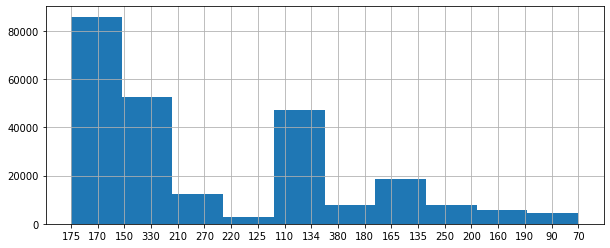

In [ ]:
transaction['PACK_SIZE'].hist(figsize=(10,4))
plt.show()

In [ ]:
# Now creating Brand name column
# we will consider first word of PROD_NAME as Brand name

transaction['BRAND'] = transaction['PROD_NAME'].str.split().str[0]

In [ ]:
transaction.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,1899-12-30,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,1899-12-30,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,1899-12-30,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,1899-12-30,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,1899-12-30,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
6,1899-12-30,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths
7,1899-12-30,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210,Grain
8,1899-12-30,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,Doritos
9,1899-12-30,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210,Grain
10,1899-12-30,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths


In [ ]:
# Some of the brand names look like they are of the same brands - such as RED and RRD, which are both RedRock Deli chips. Let’s combine these together
transaction.loc[transaction['BRAND'] == 'Red', 'BRAND'] = 'RRD'
transaction.loc[transaction['BRAND'] == 'Snbts', 'BRAND'] = 'Sunbites'
transaction.loc[transaction['BRAND'] == 'Infzns', 'BRAND'] = 'Infuzions'
transaction.loc[transaction['BRAND'] == 'WW', 'BRAND'] = 'Woolworths'
transaction.loc[transaction['BRAND'] == 'Smith', 'BRAND'] = 'Smiths'
transaction.loc[transaction['BRAND'] == 'NCC', 'BRAND'] = 'Natural'
transaction.loc[transaction['BRAND'] == 'Dorito', 'BRAND'] = 'Doritos'
transaction.loc[transaction['BRAND'] == 'Grain', 'BRAND'] = 'GrnWves'

In [ ]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,1899-12-30,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,1899-12-30,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,1899-12-30,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,1899-12-30,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,1899-12-30,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [ ]:
transaction['BRAND'].value_counts()

Kettle        41016
Smiths        30167
Doritos       25078
Pringles      24935
RRD           16209
Infuzions     14113
Thins         14004
Woolworths    11741
Cobs           9634
Tostitos       9418
Twisties       9394
GrnWves        7691
Natural        7411
Tyrrells       6398
Cheezels       4567
CCs            4526
Sunbites       2984
Cheetos        2901
Burger         1551
French         1405
Name: BRAND, dtype: int64

In [ ]:
data=pd.merge(transaction,purchase)

In [ ]:
data.shape

(245143, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245143 entries, 0 to 245142
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              245143 non-null  datetime64[ns]
 1   STORE_NBR         245143 non-null  int64         
 2   LYLTY_CARD_NBR    245143 non-null  int64         
 3   TXN_ID            245143 non-null  int64         
 4   PROD_NBR          245143 non-null  int64         
 5   PROD_NAME         245143 non-null  object        
 6   PROD_QTY          245143 non-null  int64         
 7   TOT_SALES         245143 non-null  float64       
 8   PACK_SIZE         245143 non-null  object        
 9   BRAND             245143 non-null  object        
 10  LIFESTAGE         245143 non-null  object        
 11  PREMIUM_CUSTOMER  245143 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 24.3+ MB


In [ ]:
data['TXN_ID'].isnull().sum()

0

In [ ]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1899-12-30,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,1899-12-30,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,1899-12-30,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,1899-12-30,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,1899-12-30,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
data.nunique().sort_values(ascending=False)[:13]

TXN_ID              245143
LYLTY_CARD_NBR       71285
STORE_NBR              271
PROD_NBR               105
PROD_NAME              105
TOT_SALES              105
PACK_SIZE               20
BRAND                   20
LIFESTAGE                7
PROD_QTY                 6
PREMIUM_CUSTOMER         3
DATE                     1
dtype: int64

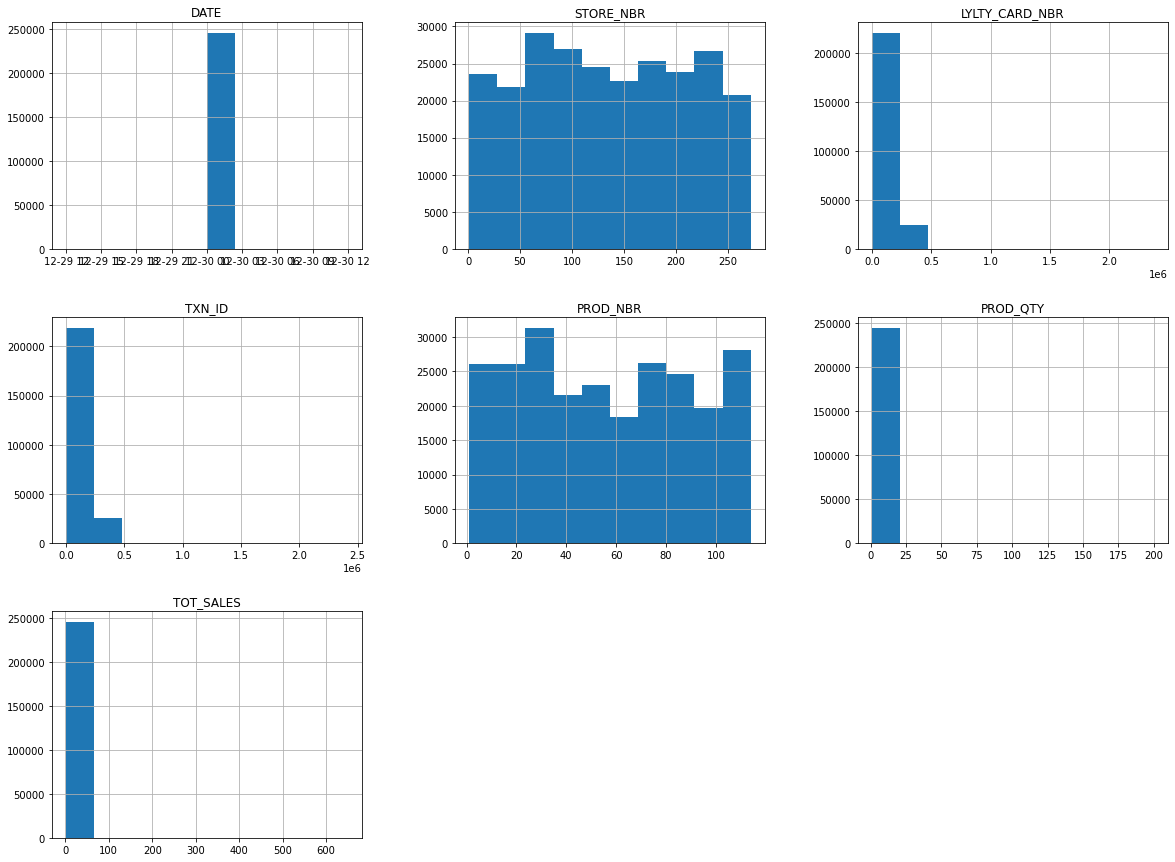

In [ ]:
data.hist(figsize=(20,15))
plt.show()

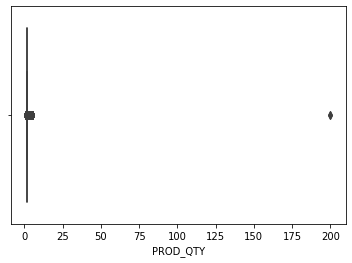

In [ ]:

sns.boxplot(x=data['PROD_QTY'])
plt.show()

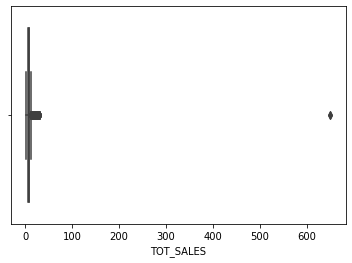

In [ ]:
sns.boxplot(x=data['TOT_SALES'])
plt.show()

In [ ]:
data.describe([.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9])

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,245143.000000,2.451430e+05,2.451430e+05,245143.000000,245143.000000,245143.000000
mean,135.054642,1.355367e+05,1.351353e+05,56.346386,1.907764,7.321015
std,76.802746,8.075514e+04,7.816433e+04,33.693215,0.661684,3.081952
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
10%,30.000000,3.008200e+04,2.698020e+04,11.000000,1.000000,3.800000
20%,58.000000,5.828100e+04,5.404240e+04,22.000000,2.000000,5.400000
25%,70.000000,7.001350e+04,6.755650e+04,26.000000,2.000000,5.800000
30%,81.000000,8.129400e+04,8.104660e+04,31.000000,2.000000,6.000000
40%,106.000000,1.062260e+05,1.080778e+05,44.000000,2.000000,6.600000
50%,130.000000,1.303700e+05,1.352000e+05,53.000000,2.000000,7.400000


In [ ]:
#outlier removal 
data= data[~(data.PROD_QTY > 5)]
data.describe()


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,245141.00000,2.451410e+05,2.451410e+05,245141.000000,245141.000000,245141.000000
mean,135.05390,1.355360e+05,1.351346e+05,56.346813,1.906148,7.315771
std,76.80262,8.075506e+04,7.816421e+04,33.693021,0.343043,2.475617
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.00000,7.001300e+04,6.755600e+04,26.000000,2.000000,5.800000
50%,130.00000,1.303700e+05,1.351990e+05,53.000000,2.000000,7.400000
75%,203.00000,2.030900e+05,2.026770e+05,87.000000,2.000000,8.800000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [ ]:
data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    94479
Budget        86157
Premium       64505
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
data['PROD_NAME'].value_counts()

Kettle Tortilla ChpsHny&Jlpno Chili 150g    3278
Kettle Mozzarella   Basil & Pesto 175g      3277
Cobs Popd Sea Salt  Chips 110g              3251
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3248
Tyrrells Crisps     Ched & Chives 165g      3245
                                            ... 
Red Rock Deli Chikn&Garlic Aioli 150g       1425
RRD Pc Sea Salt     165g                    1424
NCC Sour Cream &    Garden Chives 175g      1406
French Fries Potato Chips 175g              1405
WW Crinkle Cut      Original 175g           1398
Name: PROD_NAME, Length: 105, dtype: int64

In [ ]:
data['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     50484
RETIREES                  46195
OLDER FAMILIES            44719
YOUNG FAMILIES            40165
YOUNG SINGLES/COUPLES     33854
MIDAGE SINGLES/COUPLES    23250
NEW FAMILIES               6474
Name: LIFESTAGE, dtype: int64

In [ ]:
data['DATE'].value_counts()

1899-12-30    245141
Name: DATE, dtype: int64

In [ ]:
data['PROD_QTY'].value_counts()

2    218558
1     25394
5       415
3       406
4       368
Name: PROD_QTY, dtype: int64

In [ ]:
data.groupby(by='TOT_SALES')['PROD_NAME'].sum().sort_values(ascending=False)


TOT_SALES
1.8     Woolworths Cheese   Rings 190gWoolworths Chees...
1.9     WW Supreme Cheese   Corn Chips 200gWW Original...
3.8     WW Original Stacked Chips 160gWW D/Style Chip ...
9.5     WW D/Style Chip     Sea Salt 200gWW Original S...
5.1     WW Crinkle Cut      Original 175gSnbts Whlgrn ...
                              ...                        
2.1     CCs Original 175gCCs Original 175gCheezels Che...
6.3     CCs Nacho Cheese    175gCCs Original 175gCheez...
2.3     Burger Rings 220gBurger Rings 220gBurger Rings...
11.5    Burger Rings 220gBurger Rings 220gBurger Rings...
6.9     Burger Rings 220gBurger Rings 220gBurger Rings...
Name: PROD_NAME, Length: 104, dtype: object

In [ ]:
data.groupby(by='PROD_QTY')['TOT_SALES'].sum().sort_values(ascending=False)

PROD_QTY
2    1680929.30
1      94643.90
5       7603.95
4       5527.40
3       4690.95
Name: TOT_SALES, dtype: float64

In [ ]:
data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33135.20
1,MIDAGE SINGLES/COUPLES,Mainstream,84227.35
2,MIDAGE SINGLES/COUPLES,Premium,54069.75
3,NEW FAMILIES,Budget,20505.25
4,NEW FAMILIES,Mainstream,15944.50
5,NEW FAMILIES,Premium,10716.60
6,OLDER FAMILIES,Budget,155313.55
7,OLDER FAMILIES,Mainstream,95495.65
8,OLDER FAMILIES,Premium,74461.90
9,OLDER SINGLES/COUPLES,Budget,127090.30


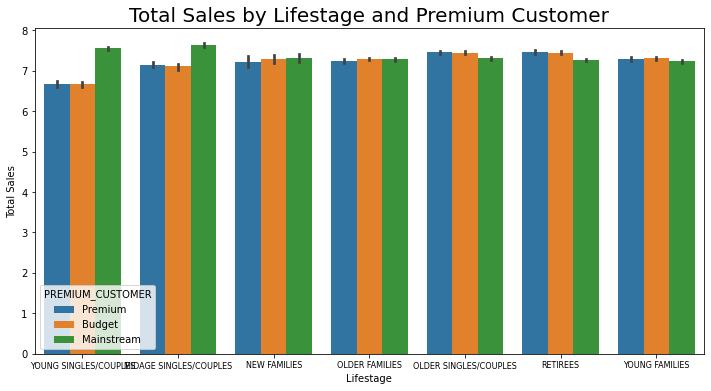

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'LIFESTAGE', y = 'TOT_SALES', hue = 'PREMIUM_CUSTOMER', data = data)
ax.set_title('Total Sales by Lifestage and Premium Customer', fontdict={'fontsize':20})
ax.set_xlabel('Lifestage')
ax.set_ylabel('Total Sales')
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=10)
plt.show()

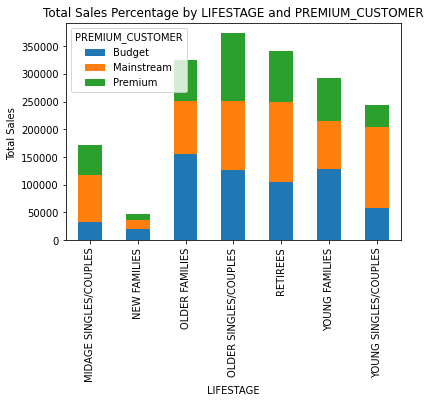

In [ ]:
# stacked chart
data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum().unstack().plot(kind='bar',stacked=True)
plt.xlabel('LIFESTAGE')
plt.ylabel('Total Sales ')
plt.title('Total Sales Percentage by LIFESTAGE and PREMIUM_CUSTOMER')
plt.show()
#Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream retirees

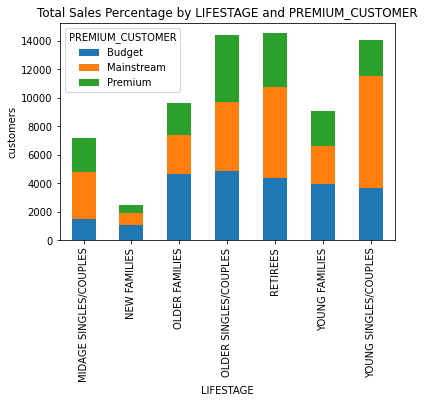

In [ ]:
## Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customers = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().sort_values(ascending=False)
customers.unstack().plot(kind='bar',stacked=True)
plt.xlabel('LIFESTAGE')
plt.ylabel('customers')
plt.title('Total Sales Percentage by LIFESTAGE and PREMIUM_CUSTOMER')
plt.show()
#There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips.

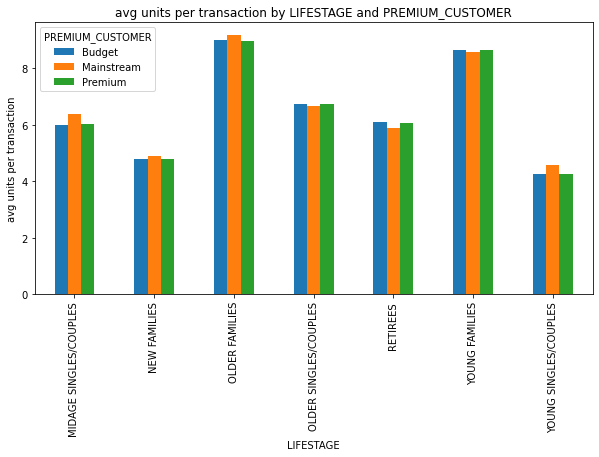

In [ ]:
#Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()/data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()

# sort by average units
avg_units = avg_units.sort_values(ascending = False)
avg_units.unstack().plot(kind='bar',stacked=False,figsize=(10,5))
plt.xlabel('LIFESTAGE')
plt.ylabel('avg units per transaction')
plt.title('avg units per transaction by LIFESTAGE and PREMIUM_CUSTOMER')
plt.show()


In [ ]:
#Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

avg_price = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum()).sort_values(ascending=False)


In [ ]:
avg_price.head()

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          4.075299
MIDAGE SINGLES/COUPLES  Mainstream          3.994278
NEW FAMILIES            Mainstream          3.934970
                        Budget              3.933484
RETIREES                Budget              3.932599
dtype: float64

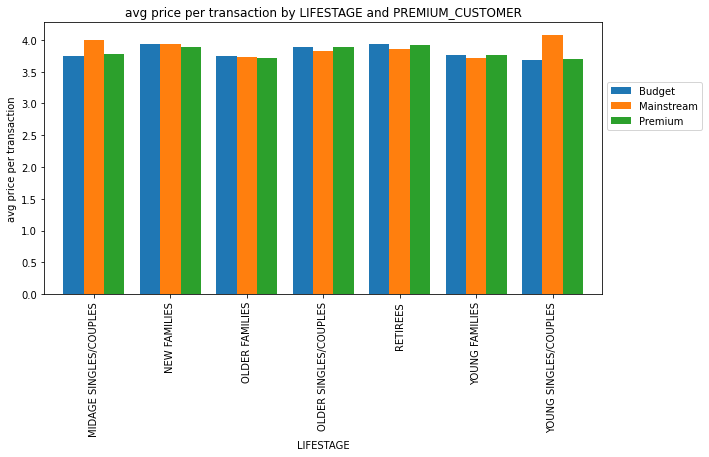

In [ ]:
#Create plot
avg_price.unstack().plot(kind='bar',stacked=False,width=0.8,figsize=(10,5))
plt.xlabel('LIFESTAGE')
plt.ylabel('avg price per transaction')
plt.title('avg price per transaction by LIFESTAGE and PREMIUM_CUSTOMER')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.show()

In [ ]:
#Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts
#As the difference in average price per unit isn’t large, we can check if this difference is statistically different
from scipy import stats
pricePerUnit = data.loc[:, 'price'] = data['TOT_SALES'] / data['PROD_QTY']
t_test = stats.ttest_ind(data.loc[(data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']) & 
(data['PREMIUM_CUSTOMER'] == 'Mainstream')), 'price'], data.loc[(data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']) & 
(data['PREMIUM_CUSTOMER'] != 'Mainstream')), 'price'], alternative='greater')
t_test

#The t-test results in a p-value < 2.2e-16, i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

Ttest_indResult(statistic=37.74511877962881, pvalue=2.8646825238355303e-308)

In [ ]:
#Let’s look at Mainstream - young singles/couples. For instance, let’s find out if they tend to buy a particular brand of chips.

segment1 = data[(data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (data['PREMIUM_CUSTOMER'] == "Mainstream")]
other = data[~((data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (data['PREMIUM_CUSTOMER'] == "Mainstream"))]


In [ ]:
# Brand affinity compared to the rest of the population
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

quantity_segment1_by_brand = segment1.groupby('BRAND')['PROD_QTY'].sum()/ quantity_segment1
quantity_other_by_brand = other.groupby('BRAND')['PROD_QTY'].sum()/ quantity_other

brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='BRAND')
brand_proportions['affinityToBrand'] = quantity_segment1_by_brand/quantity_other_by_brand
brand_proportions.sort_values('affinityToBrand', ascending=False)

#• Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population
#• Mainstream young singles/couples are 57% less likely to purchase Burger Rings compared to the restof the population

,PROD_QTY_x,PROD_QTY_y,affinityToBrand
BRAND,,,
Tyrrells,0.031615,0.025678,1.231185
Twisties,0.046189,0.037884,1.219215
Doritos,0.122884,0.101126,1.215153
Kettle,0.198387,0.165500,1.198715
Tostitos,0.045413,0.038016,1.194568
Pringles,0.119476,0.100623,1.187361
Cobs,0.044471,0.039083,1.137856
Infuzions,0.064642,0.057075,1.132575
Thins,0.060320,0.057082,1.056714


In [ ]:
# Preferred pack size compared to the rest of the population

quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

quantity_segment1_by_pack = segment1.groupby('PACK_SIZE')['PROD_QTY'].sum()/quantity_segment1
quantity_other_by_pack = other.groupby('PACK_SIZE')['PROD_QTY'].sum()/quantity_other

pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, on='PACK_SIZE')
pack_proportions['affinityToPack'] = quantity_segment1_by_pack/quantity_other_by_pack
pack_proportions.sort_values(by='affinityToPack',ascending=False)

,PROD_QTY_x,PROD_QTY_y,affinityToPack
PACK_SIZE,,,


Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
- retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.
Quantium can help the Category Manager with recommendations of where these segments are and further
help them with measuring the impact of the changed placement.